<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/04_Estimacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy
import scipy.stats
import seaborn

seaborn.set_context('talk')

# TCL, distribución de estadísticos, estimación puntual y por intervalos


## Generación de datos

1. Generamos 1 realización de una muestra aleatoria $X_1,  ... X_n$ (de tamaño n)

$X_1,  ... X_n$ (i.i.d) con cada $X_i$ con distribución conocida (mejor no normal). Por ejemplo: Poisson. Graficar la distribución de la muestra.

2. Luego tenemos 1 realización del estadístico $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$.



promedio de la muestra= 5.106 , una realización del estadístico media muestral


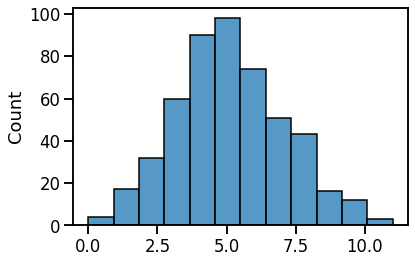

In [4]:
# Generación de muestras de una distribución poisson

n = 500 

lambd = 5 

sample = scipy.stats.poisson.rvs(lambd, size=n) #realización de una muestra aleatoria X_1,  ... X_n (de tamaño n)

seaborn.histplot(sample, bins=12)
print ('promedio de la muestra=', sample.mean(), ', una realización del estadístico media muestral')


1. Generamos N realizaciones de una muestra aleatoria $X_1,  ... X_n$ (de tamaño n)

$X_1,  ... X_n$ (i.i.d) con cada $X_i$ con distribución no normal. Por ejemplo: Poisson. Elegir una realización y graficar la distribución de la muestra.

2. Luego tendríamos N realizaciones del estadístico $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$.

Graficar la distribución de estas realizaciones (de las medias muestrales). ¿Se parece a una distribución normal?

In [5]:
# Generación de muestras de una distribución poisson

N = 400 #N filas, N realizaciones de una muestra aleatoria X_1,  ... X_n (tamaño n)
n = 5000 

lambd = 10

samples = scipy.stats.poisson.rvs(lambd, size=(N, n))

[16  2  6 13] ... [14 10  8 12]
media=  10.073


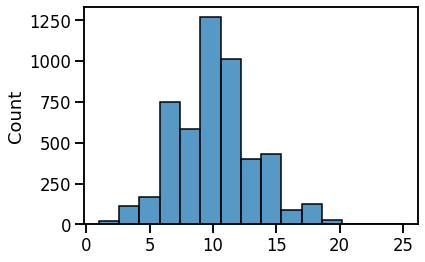

In [6]:
#primera realización de la m.a.
print(samples[0][:4],'...', samples[0][-5:-1])

# Histograma de la i-ésima realización de la muestra
i=0
seaborn.histplot(samples[i], bins=15)
print('media= ', samples[i].mean())

In [7]:
# Calculamos la media para cada una de las muestras. 
sample_means = samples.mean(axis=1) #media de cada fila, tendremos N medias
sample_means.shape

(400,)

Veamos la distribución de las N realizaciones del estadístico $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$ 

Media de medias = 9.998977
Varianza de medias = 0.0017336044710000004


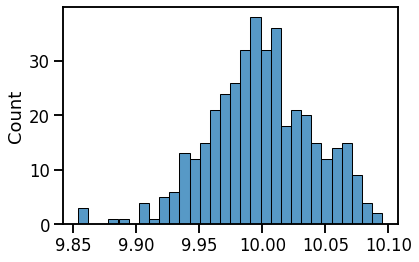

In [8]:
seaborn.histplot(sample_means, bins=30)
print('Media de medias =', sample_means. mean())
print('Varianza de medias =', sample_means. var())

In [9]:
# documentación de la función norm de scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# Estima la media y el desvío (los parámetros de una normal)  
mu, std = scipy.stats.norm.fit(sample_means)
mu, std, std**2

(9.998977, 0.04163657612004138, 0.0017336044710000002)

## Ejercicio 1 (para realizar en grupo en clase 3)

1. Analizar qué pasa cuando crece $n$ y ver la distribución de $\overline{X}= \frac{1}{n} \sum_{i=1}^{n} X_i$ cuando $n\rightarrow \infty$ (el tamaño de la muestra). ¿Qué sucede con la varianza?

2. Realizar el mismo análisis con otra distribución no normal, por ejemplo, exponencial.

In [10]:
# Generación de muestras de una distribución exponencial
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
l = 5
s = 2
# media=l+s
# varianza=s^2
N = 1000 #N filas, N realizaciones de una muestra aleatoria X_1,  ... X_n (tamaño n)
n = 10000
samples = scipy.stats.expon.rvs(loc=l,scale=s,size=(N, n))

[5.19872165 6.47045823 8.24590491 8.27393992] ... [7.94196015 6.84482389 5.67920435 5.30729456]
media=  6.999639607184875
varianza= 0.00041488655197666153


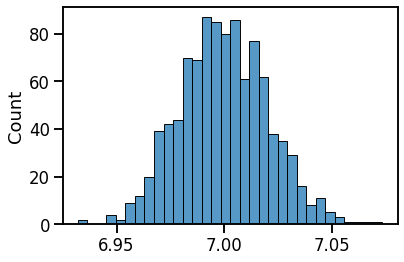

In [11]:
#primera realización de la m.a.
print(samples[0][:4],'...', samples[0][-5:-1])

# Histograma de la i-ésima realización de la muestra
# Calculamos la media para cada una de las muestras. 
sample_means = samples.mean(axis=1) #media de cada fila, tendremos N medias
sample_means.shape
seaborn.histplot(sample_means, bins="sqrt")
print('media= ', sample_means.mean())
print('varianza=', sample_means.var())

Si varia N la gráfica tienda a una normal y si varía la n la varianza disminuye

Media de medias = 6.999639607184875
Varianza de medias = 0.00041488655197666153


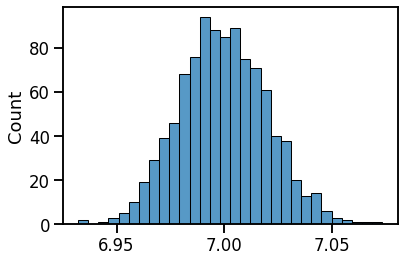

In [12]:
seaborn.histplot(sample_means, bins=30)
print('Media de medias =', sample_means. mean())
print('Varianza de medias =', sample_means. var())

In [25]:
# Generación de muestras de una distribución exponencial
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
l = 5
s = 2
# media=l+s
# varianza=s^2
N = 1 #N filas, N realizaciones de una muestra aleatoria X_1,  ... X_n (tamaño n)
n = 1000
samples = scipy.stats.expon.rvs(loc=l,scale=s,size=n)

Media de medias = 6.880892124684153
Varianza de medias = 3.290096705101752


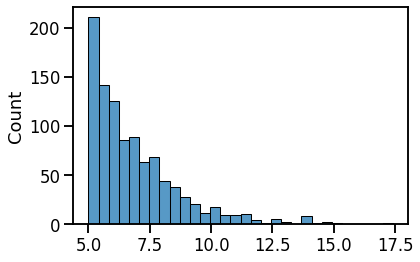

In [26]:
seaborn.histplot(samples, bins=30)
print('Media de medias =', samples.mean())
print('Varianza de medias =', samples.var())

## Ejercicio 2: Estimadores puntuales y por intervalos (para realizar en grupo en clase 3)
0. Fijar n=1000
1. Dar un estimador puntual de la media de la distribución generada

In [27]:
mu, std = scipy.stats.expon.fit(samples)
mu, std, std**2

(5.000567896637632, 1.880324228046521, 3.5356192025787454)

In [36]:
mean = samples.mean()
var = samples.var()

In [51]:
alpha = 0.4
df=n-1
result = scipy.stats.t.ppf([alpha/2,1-alpha/2],df)

In [50]:
7+result*var/numpy.sqrt(n)

array([6.82870731, 7.17129269])

In [52]:
7+result*var/numpy.sqrt(n)

array([6.9123986, 7.0876014])

2. Dar un intervalo de confianza (IC) para la media de nivel asintótico 0.95=(1-alpha), calcular la longitud del intervalo.
3. Dar N=1000 realizaciones del intervalo de confianza para la media de nivel 0.95 y contar cuantos contienen a la media verdadera. 
4. Incrementar n=4000 (por 4) y repetir el paso 2. Qué le pasó a la longitud el IC ?
